# Redes Neuronales Artificiales 

### 2. Selección de la Variable Respuesta (clasificación)


Distribución de categorías de precios (SalePrice_cat):
SalePrice_cat
caro      497
barato    483
medio     480
Name: count, dtype: int64


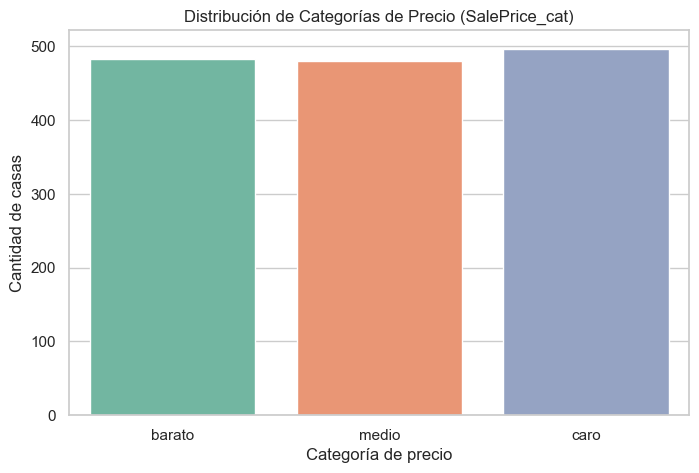

In [6]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración general
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("../data/train_preprocessed.csv")

# Crear categorías de precio basadas en terciles
df['SalePrice_cat'] = pd.cut(df['SalePrice'],
                             bins=[-np.inf, df['SalePrice'].quantile(0.33),
                                   df['SalePrice'].quantile(0.66),
                                   np.inf],
                             labels=['barato', 'medio', 'caro'])

# Verificar la nueva variable
print("\nDistribución de categorías de precios (SalePrice_cat):")
print(df['SalePrice_cat'].value_counts())

# Visualización gráfica corregida
plt.figure(figsize=(8,5))
sns.countplot(x='SalePrice_cat', hue='SalePrice_cat', data=df, palette='Set2', legend=False)
plt.title('Distribución de Categorías de Precio (SalePrice_cat)')
plt.xlabel('Categoría de precio')
plt.ylabel('Cantidad de casas')
plt.show()